In [1]:
import numpy as np
import pandas as pd
from framework.train import train_model
from framework.preprocess import load_data, preprocess_data
from framework.pca import apply_existing_pca, visualize_pca_explained_variance
from framework.evaluation import classification_report
from framework.hyperparameter_search import HyperparameterSearch

In [2]:
gesture_map = {
    "swipe_left": 0,
    "swipe_right": 1,
    "rotate": 2,
    "idle": 3,
    "flip_table": 4, 
    "point": 5,
    "zoom_in": 6,
    "zoom_out": 7
    }

Feature columns used for training: ['nose_x', 'nose_y', 'nose_z', 'nose_confidence', 'left_eye_inner_x', 'left_eye_inner_y', 'left_eye_inner_z', 'left_eye_inner_confidence', 'left_eye_x', 'left_eye_y', 'left_eye_z', 'left_eye_confidence', 'left_eye_outer_x', 'left_eye_outer_y', 'left_eye_outer_z', 'left_eye_outer_confidence', 'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_inner_z', 'right_eye_inner_confidence', 'right_eye_x', 'right_eye_y', 'right_eye_z', 'right_eye_confidence', 'right_eye_outer_x', 'right_eye_outer_y', 'right_eye_outer_z', 'right_eye_outer_confidence', 'left_ear_x', 'left_ear_y', 'left_ear_z', 'left_ear_confidence', 'right_ear_x', 'right_ear_y', 'right_ear_z', 'right_ear_confidence', 'left_mouth_x', 'left_mouth_y', 'left_mouth_z', 'left_mouth_confidence', 'right_mouth_x', 'right_mouth_y', 'right_mouth_z', 'right_mouth_confidence', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_confidence', 'right_shoulder_x', 'right_shoulder_y', 'right_s

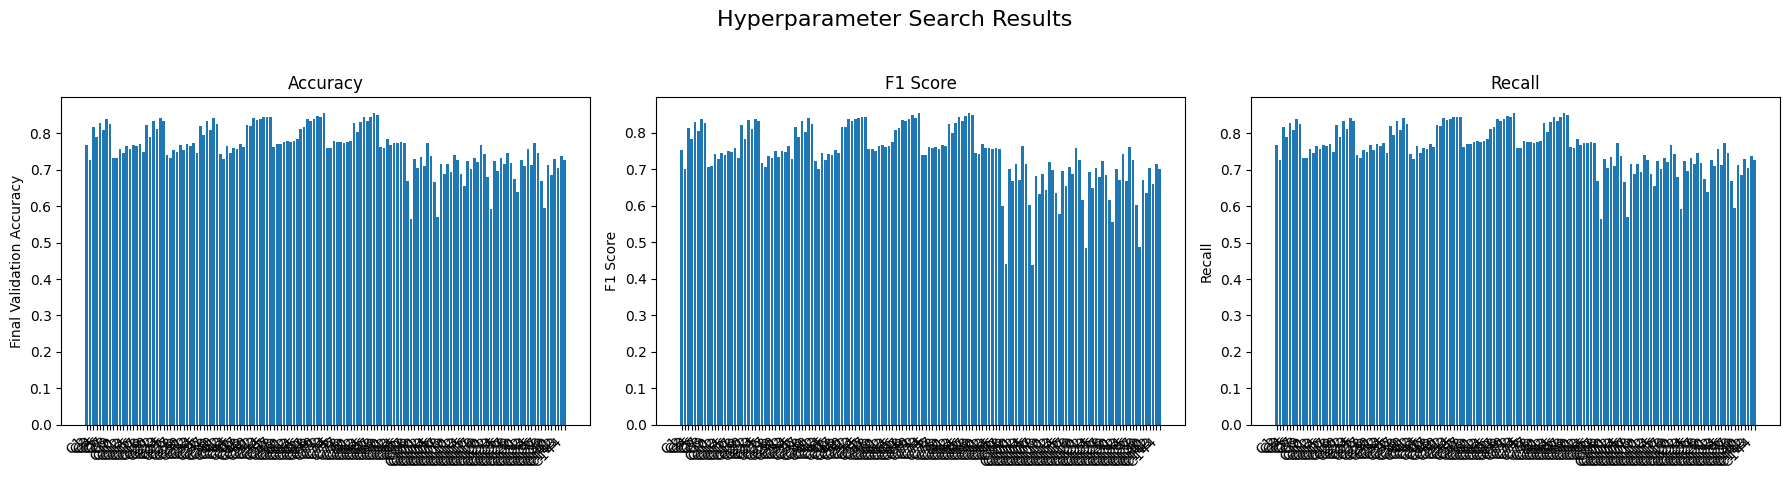

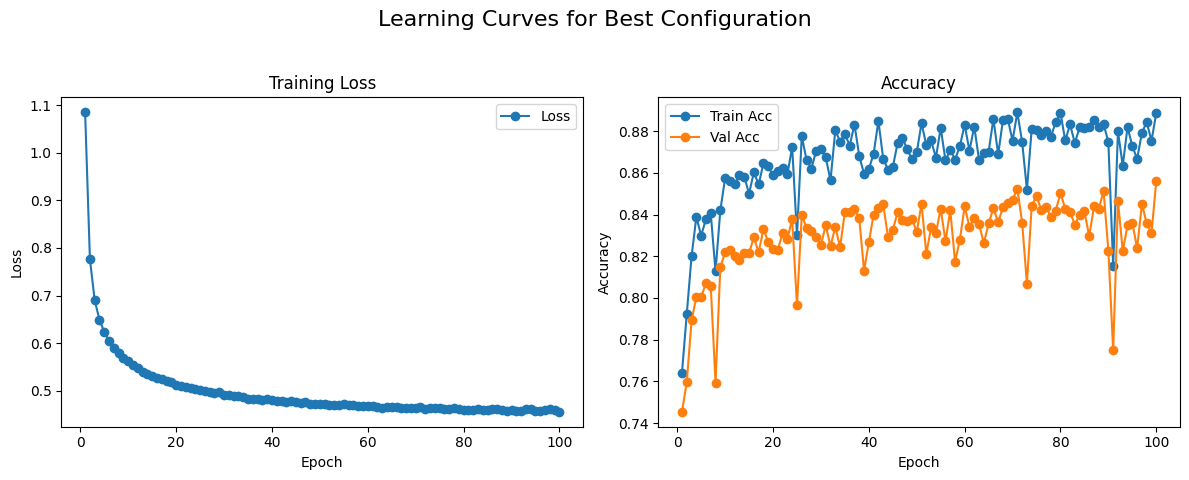

In [3]:
train_mandatory_df = load_data(data_dir="data/mandatory/train")
train_optional_df = load_data(data_dir="data/optional/train")

val_mandatory_df = load_data(data_dir="data/mandatory/validation")
val_optional_df = load_data(data_dir="data/optional/validation")

combined_train_df = pd.concat([train_mandatory_df, train_optional_df], ignore_index=True)
combined_val_df = pd.concat([val_mandatory_df, val_optional_df], ignore_index=True)

# Load raw training and validation data from separate folders.
train_mandatory_df = load_data(data_dir="data/mandatory/train")
train_optional_df = load_data(data_dir="data/optional/train")

val_mandatory_df = load_data(data_dir="data/mandatory/validation")
val_optional_df = load_data(data_dir="data/optional/validation")

combined_train_df = pd.concat([train_mandatory_df, train_optional_df], ignore_index=True)
combined_val_df = pd.concat([val_mandatory_df, val_optional_df], ignore_index=True)

# Set PCA parameter (e.g., capture 99.9% of variance).
components_or_variance = 0.999  
# Preprocess training data and fit PCA.
X_train, y_train, pca_params_train = preprocess_data(
    combined_train_df, 
    components_or_variance=components_or_variance, 
    gesture_map=gesture_map
)

# Preprocess validation data (without PCA), then apply the PCA transformation.
X_val, y_val, _ = preprocess_data(
    combined_val_df, 
    components_or_variance=None, 
    gesture_map=gesture_map
)

X_val = apply_existing_pca(X_val, pca_params_train)

input_size = X_val.shape[1]
print(f"Input size (number of features): {input_size}")

param_grid = {
    'learning_rate': [0.01, 0.1, 0.001],
    'hidden_dim': [[64, 32], [64, 64], [64, 64]],
    'reg_lambda': [0.001, 0.01],
    'epochs': [10, 30, 50, 100],
    'n_layers': [2],
    'loss_function': ['cross_entropy'],
    'batch_size': [32, 64]
}
components_or_variance = 0.999  

# Create a HyperparameterSearch object.
searcher = HyperparameterSearch(
    param_grid, 
    epochs=50, 
    batch_size=32, 
    components_or_variance=components_or_variance, 
    df=combined_train_df
)

searcher.X_train = X_train
searcher.y_train = y_train
searcher.X_val = X_val
searcher.y_val = y_val
searcher.pca_params = pca_params_train

searcher.search()

best_result = searcher.get_best()
if best_result is not None:
    print("Best hyperparameter configuration:")
    print(best_result)
else:
    print("No hyperparameter search results found.")

searcher.plot_results()
searcher.plot_best_history()

In [4]:
best_result = searcher.get_best()
if best_result is not None:
    print("Best hyperparameter configuration:")
    print(best_result)
else:
    print("No hyperparameter search results found.")


Best hyperparameter configuration:
n_layers                                                          2
hidden_layers                                              [64, 64]
learning_rate                                                   0.1
n_epochs                                                        100
loss_function                                         cross_entropy
reg_lambda                                                    0.001
batch_size                                                       64
Score                                                          None
Accuracy                                                   0.856189
F1                                                         0.854819
Precision                                                  0.865972
Recall                                                     0.856189
train_accuracy                                             0.888729
train_loss                                                 0.456034
history      

Feature columns used for training: ['nose_x', 'nose_y', 'nose_z', 'nose_confidence', 'left_eye_inner_x', 'left_eye_inner_y', 'left_eye_inner_z', 'left_eye_inner_confidence', 'left_eye_x', 'left_eye_y', 'left_eye_z', 'left_eye_confidence', 'left_eye_outer_x', 'left_eye_outer_y', 'left_eye_outer_z', 'left_eye_outer_confidence', 'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_inner_z', 'right_eye_inner_confidence', 'right_eye_x', 'right_eye_y', 'right_eye_z', 'right_eye_confidence', 'right_eye_outer_x', 'right_eye_outer_y', 'right_eye_outer_z', 'right_eye_outer_confidence', 'left_ear_x', 'left_ear_y', 'left_ear_z', 'left_ear_confidence', 'right_ear_x', 'right_ear_y', 'right_ear_z', 'right_ear_confidence', 'left_mouth_x', 'left_mouth_y', 'left_mouth_z', 'left_mouth_confidence', 'right_mouth_x', 'right_mouth_y', 'right_mouth_z', 'right_mouth_confidence', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_confidence', 'right_shoulder_x', 'right_shoulder_y', 'right_s

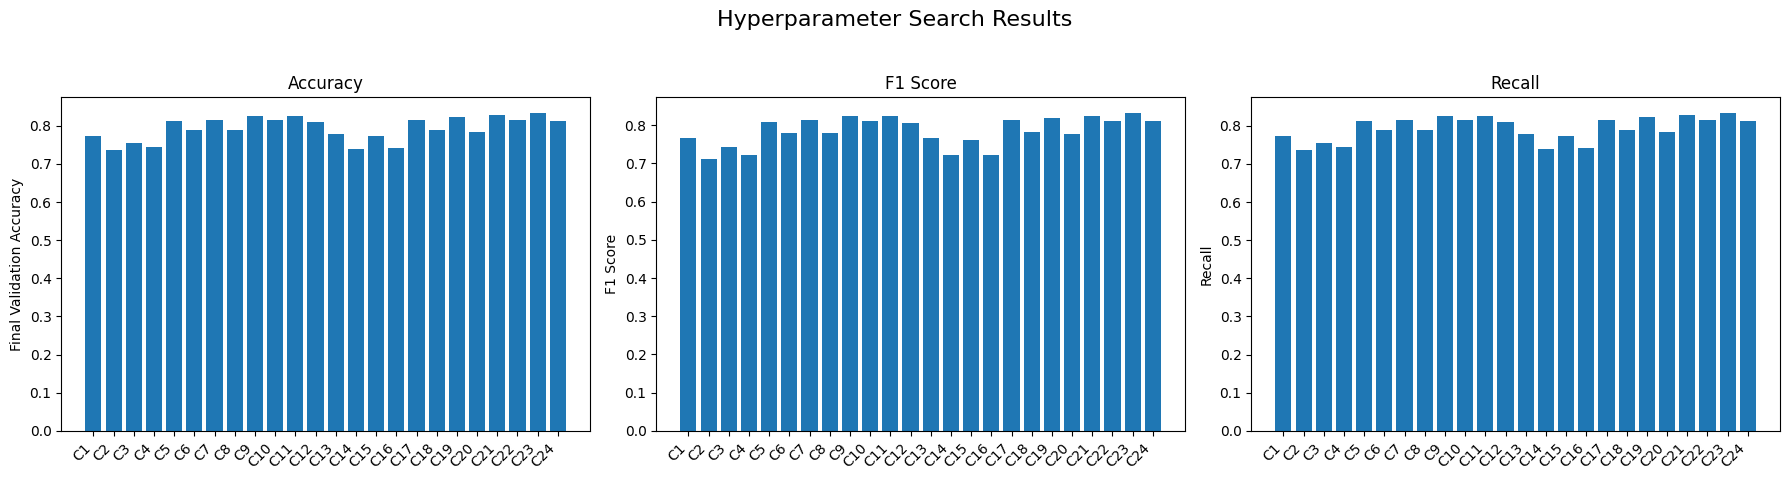

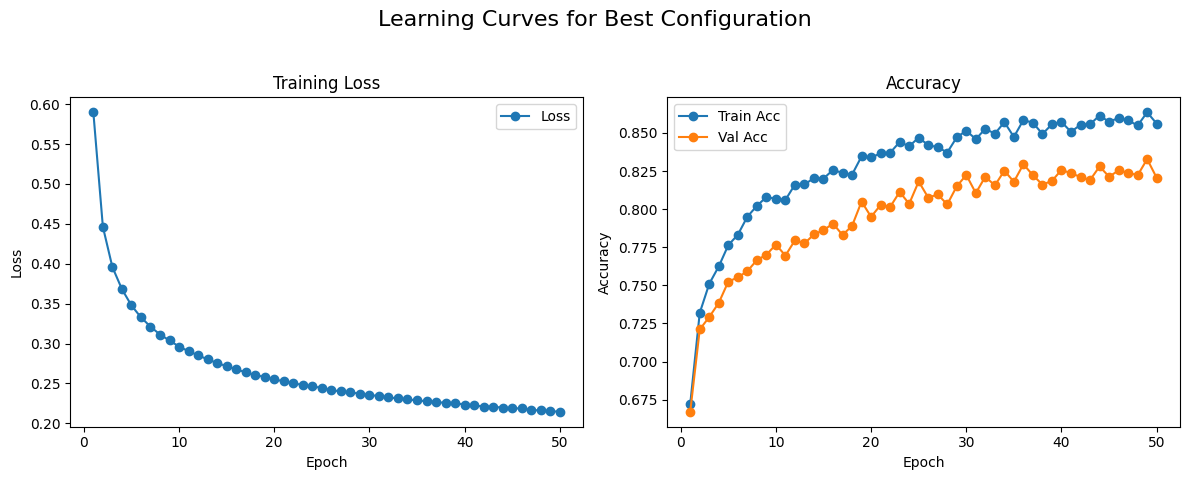

In [8]:
gesture_map = {
    "swipe_left": 0,
    "swipe_right": 1,
    "rotate": 2,
    "idle": 3
}

combined_train_df = load_data(data_dir="data/mandatory/train")
combined_val_df = load_data(data_dir="data/mandatory/validation")

param_grid = {
    'learning_rate': [0.01],
    'hidden_dim': [[64, 32], [64, 64]],
    'reg_lambda': [0.001],
    'epochs': [10, 30, 50],
    'n_layers': [2],
    'loss_function': ['cross_entropy', 'mse'],
    'batch_size': [32, 64]
}

# Create a HyperparameterSearch object.
searcher = HyperparameterSearch(
    param_grid, 
    epochs=50, 
    batch_size=32, 
    components_or_variance=components_or_variance, 
    df=combined_train_df
)

searcher.X_train = X_train
searcher.y_train = y_train
searcher.X_val = X_val
searcher.y_val = y_val
searcher.pca_params = pca_params_train

searcher.search()

best_result = searcher.get_best()
if best_result is not None:
    print("Best hyperparameter configuration:")
    print(best_result)
else:
    print("No hyperparameter search results found.")

searcher.plot_results()
searcher.plot_best_history()

In [9]:
best_result = searcher.get_best()
if best_result is not None:
    print("Best hyperparameter configuration:")
    print(best_result)
else:
    print("No hyperparameter search results found.")


Best hyperparameter configuration:
n_layers                                                          2
hidden_layers                                              [64, 64]
learning_rate                                                  0.01
n_epochs                                                         50
loss_function                                                   mse
reg_lambda                                                    0.001
batch_size                                                       32
Score                                                          None
Accuracy                                                   0.832808
F1                                                         0.831341
Precision                                                  0.845259
Recall                                                     0.832808
train_accuracy                                             0.856095
train_loss                                                 0.214472
history      